In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml
import re 
import sys
from pathlib import Path
src_utils_path = Path("../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo

In [20]:
exp_dir = "/pscratch/sd/l/linyaoly/MJO_ML_2025/script/model/exp"
exp_names = [
    # "CNN_1_FCN_1_map_to_leads",
    "CNN_2_FCN_2_map_to_leads",
    # "CNN_3_FCN_3_map_to_leads",
    "CNN_2_FCN_2_hov_to_leads",
    "CNN_2_FCN_2_hov_two_to_leads",
    "CNN_2_FCN_2_latavg_to_leads",
    # "CNN_2_FCN_2_latavg_time_to_leads",
    "CNN_2_FCN_2_map_sym_to_leads",
    "CNN_2_FCN_2_map_asym_to_leads",
]

folder_list = [os.path.join(exp_dir, name) for name in exp_names]

exp_labels = []
bcc_list = []
rmse_list = []
bccavg_list = []
rmseavg_list = []

for folder in folder_list:
    skills_path = os.path.join(folder, "skills.npz")
    if not os.path.exists(skills_path):
        print(f"{skills_path} not found, skipping.")
        continue

    data = np.load(skills_path)
    bccs = data["bccs"]
    rmses = data["rmses"]
    bcc = data["bcc"]
    rmse = data["rmse"]
    
    exp_labels.append(os.path.basename(folder))
    bcc_list.append(bccs)
    rmse_list.append(rmses)
    bccavg_list.append(bcc)
    rmseavg_list.append(rmse)

# Convert lists to arrays
bcc_arr = np.array(bcc_list)
rmse_arr = np.array(rmse_list)
bccavg_arr = np.array(bccavg_list)
rmseavg_arr = np.array(rmseavg_list)


In [4]:
bcc_arr.shape 

(8, 96, 36)

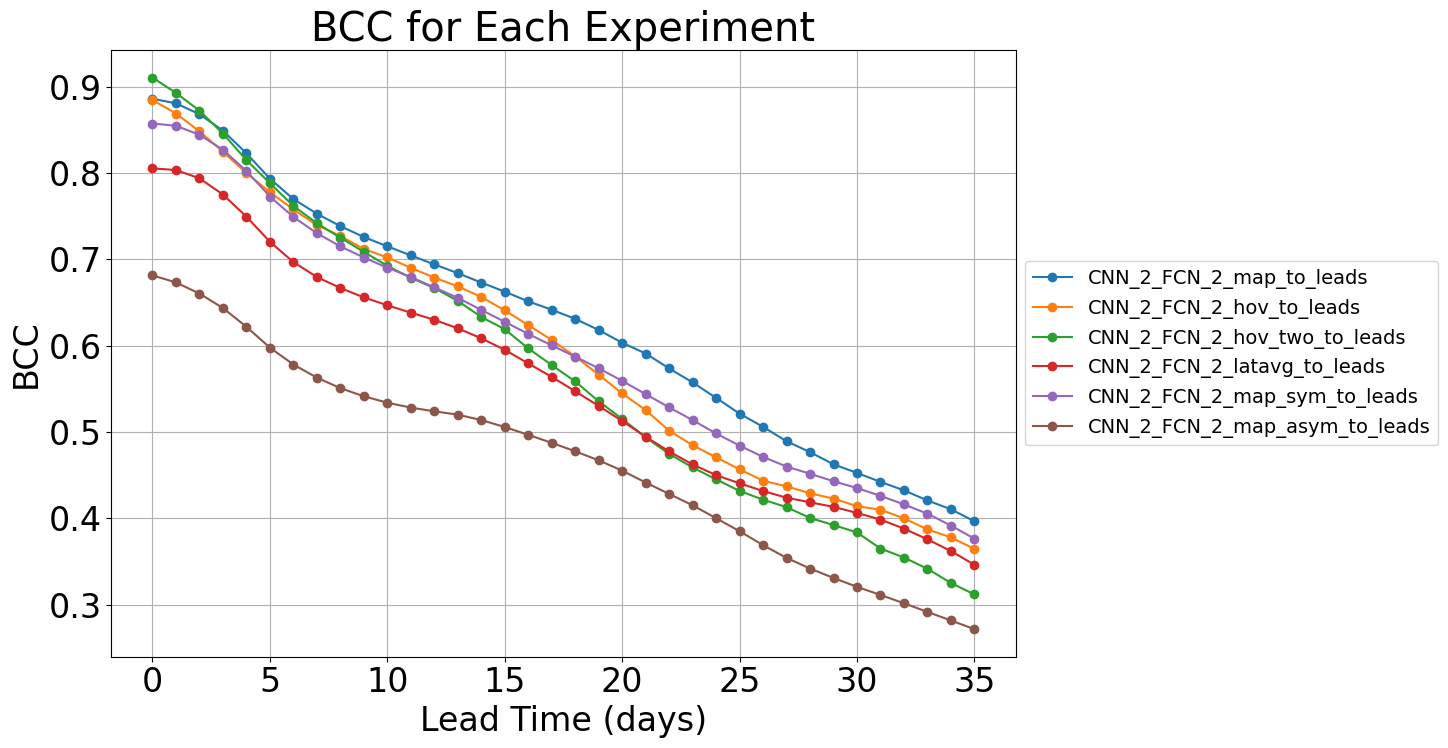

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assume bcc_arr and rmse_arr have shape (n_experiments, n_exp_num, n_lead)
# If shape is (n_experiments, n_lead), just use [:] instead of .T

lead = np.arange(bcc_arr.shape[-1])
n_exp = len(exp_labels)

# Choose a colormap with enough distinct colors
cmap = plt.get_cmap('tab10')  # Up to 10 distinct colors; use 'tab20' for more
plt.rcParams['font.size'] = 24
plt.figure(figsize=(15, 8))
for i, label in enumerate(exp_labels):
    color = cmap(i % cmap.N)
    plt.plot(lead, bccavg_arr[i], label=label, marker='o', color=color)
    # plt.fill_between(lead, bcc_arr[i].min(axis=0), bcc_arr[i].max(axis=0), color=color, alpha=0.2)
plt.title('BCC for Each Experiment')
plt.xlabel('Lead Time (days)')
plt.ylabel('BCC')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(8.5, 6.5))
# for i, label in enumerate(exp_labels[:3]):
#     color = cmap(i % cmap.N)
#     plt.plot(lead, rmseavg_arr[i], label=label, marker='o', color=color)
#     plt.fill_between(lead, rmse_arr[i].min(axis=0), rmse_arr[i].max(axis=0), color=color, alpha=0.2)
# plt.title('RMSE for Each Experiment')
# plt.xlabel('Lead Time (days)')
# plt.ylabel('RMSE')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
